<a href="https://colab.research.google.com/github/medicharlachiranjeevi/Deep-Learning-with-Keras/blob/master/Reference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip "/content/drive/My Drive/DL# Beginner.zip"

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from glob import glob


In [0]:

#%%
# Reading the train and test csv files 
train = pd.read_csv('/content/DL# Beginner/meta-data/train.csv')
test = pd.read_csv('/content/DL# Beginner/meta-data/test.csv')


#%%
train.head()



,Image_id,Animal
0,Img-1.jpg,hippopotamus
1,Img-2.jpg,squirrel
2,Img-3.jpg,grizzly+bear
3,Img-4.jpg,ox
4,Img-5.jpg,german+shepherd


There are 13000 images in the train dataset.
There are 6000 images in the test datasets.
There are 30 unique animals in the dataset.
The dataset contain images of the following animals:

 ['hippopotamus' 'squirrel' 'grizzly+bear' 'ox' 'german+shepherd' 'buffalo'
 'otter' 'bobcat' 'wolf' 'persian+cat' 'collie' 'antelope' 'seal'
 'dalmatian' 'siamese+cat' 'moose' 'horse' 'killer+whale' 'mouse' 'walrus'
 'beaver' 'rhinoceros' 'chimpanzee' 'weasel' 'spider+monkey' 'raccoon'
 'rat' 'chihuahua' 'mole' 'bat']


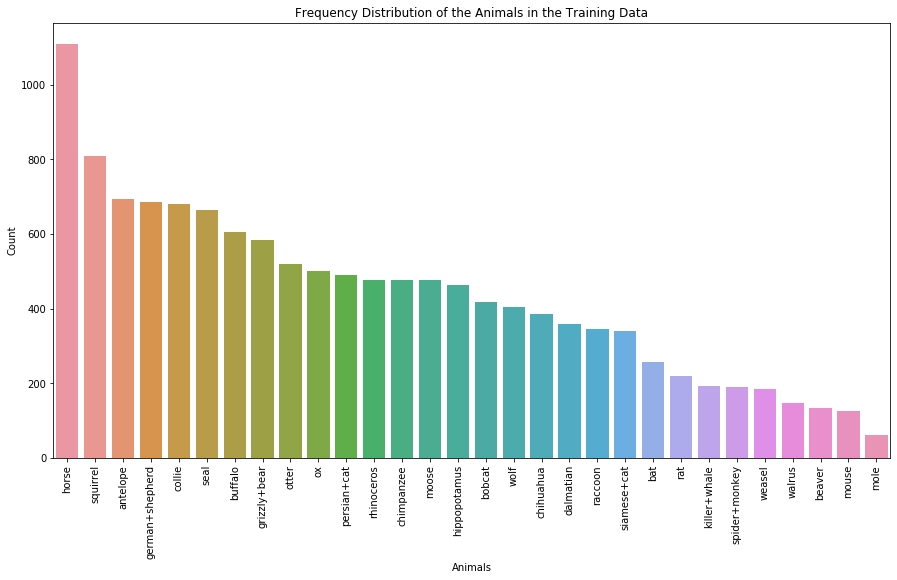

In [0]:

#%%
# Number of images in the training and the test datasets. 
print('There are {} images in the train dataset.'.format(train.shape[0]))
print('There are {} images in the test datasets.'.format(test.shape[0]))


#%%
# Number of unique animals in the datasets
print('There are {} unique animals in the dataset.'.format(train.Animal.unique().shape[0]))

#%% [markdown]
# Lets see which Animals are there in the dataset.

#%%
print('The dataset contain images of the following animals:\n\n', train.Animal.unique())


#%%
animal_count = pd.value_counts(train.Animal)


#%%
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=animal_count.index, y=animal_count.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation= 90)
ax.set_title('Frequency Distribution of the Animals in the Training Data')
ax.set(xlabel='Animals', ylabel='Count')
plt.show()



In [0]:

#%%
### Checking for any null values in the labels 
labels  =  train.Animal
labels.isnull().any()


#%%
### Train adn Test image folder paths

TRAIN_PATH = '/content/DL# Beginner/train/' 
TEST_PATH = '/content/DL# Beginner/test/'


#%%
### Importing Python Image Library and Opencv library
from PIL import Image
import cv2


#%%


In [0]:
print('Animal: ',train.Animal[0])
Image.open(TRAIN_PATH + train.Image_id[0])

img = cv2.imread(TRAIN_PATH+train.Image_id[0])




Animal:  hippopotamus


In [0]:
sample = train.head()
for idx in sample.Image_id:
    img = cv2.imread(TRAIN_PATH + idx)
    print('{} : {}'.format(idx, img.shape))


Img-1.jpg : (1024, 576, 3)
Img-2.jpg : (771, 1024, 3)
Img-3.jpg : (683, 1024, 3)
Img-4.jpg : (681, 1024, 3)
Img-5.jpg : (500, 332, 3)


In [0]:
from tqdm import tqdm
from tensorflow.keras.applications.vgg16 import preprocess_input

def read_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    return img



In [0]:
import os
train_img = []
count=0
for img_path in tqdm(train.Image_id.values):
    if os.path.exists(TRAIN_PATH + img_path):
      count=count+1
      train_img.append(read_img(TRAIN_PATH + img_path))

100%|██████████| 13000/13000 [02:20<00:00, 93.95it/s]


In [0]:

import gc
X_train = np.array(train_img, np.float32) / 255.
#X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)


del train_img
gc.collect()

# Next, we will calculate the mean and standard deviation of the images in the training dataset.

#%%
mean_img = X_train.mean(axis = 0)


#%%
std_dev = X_train.std(axis = 0)

# Next, we will normalize the image data using the following formula: 
# 
# <center>** X = (x - mean of x)/(std. deviation of x)**<center/>
# 
# Normalization helps us to standardize the input values. Standardizing the inputs can make training faster and reduce the chances of getting stuck in local minima. Also, we like the features to haves similar ranges so that our gradients don't go out of control.

X_norm = (X_train - mean_img)/ std_dev


X_norm.shape


del X_train
gc.collect()

# Next we label encode the lables in the train data. Label Encoding is used to transform non-numerical labels or categporical labels to numerical lables. 

#%%


0

In [0]:
from sklearn.preprocessing import LabelEncoder


#%%
lb = LabelEncoder()
lb.fit(train.Animal.values)
y = lb.transform(train.Animal.values)


#%%
from sklearn.model_selection import train_test_split

# Finally, we create the training and validation sets. 

#%%
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X_norm, y, test_size=0.15, random_state=47)


#%%
del X_norm
gc.collect()


NameError: ignored

In [0]:
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16

# Next, we will one-hot encode the labels before supplying them to the model. Since label encoding (a.k.a integer encoding) will have a ordinal relationship between them. But for categorical variables where no such ordinall relationship exists, the integer encoding is not enough. In this case, one-hot encoding can be applied to the integer representation, where the integer enocoded variable is removed and a new binary variable is added for each unique integer value.  

#### One hot encoding labels.
ytrain = np_utils.to_categorical(ytrain)
yvalid = np_utils.to_categorical(yvalid)

# We will build a model from scratch. We will use a Sequential model, which is a linear stack of layers, to build this model. 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))


model.add(Flatten())



model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(30, activation='softmax'))


#model.add(VGG16())
#model.add(BatchNormalization(input_shape = Xtrain.shape[1:]))
#model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.15))
#model.add(Conv2D(128, kernel_size=(3, 3), activation= 'softmax'))
#model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
#model.add(Conv2D(128, kernel_size=(3, 3), activation= 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))
#model.add(Dropout(0.15))

#model.add(Flatten())
#model.add(Dropout(0.25))
#model.add(Dense(30, activation='softmax'))


#%%
### Generating a summary of the model.
#model.summary()

# There are approximately 11 million parameters to train. 
# Next, we will define the loss function and the optimizer for the model.

#%%
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


#%%
#early_stops = EarlyStopping(patience=5, monitor='val_acc')
#checkpointer = ModelCheckpoint(filepath='weights.best.eda.hdf5', verbose=1, save_best_only=True)


#%%
model.fit(Xtrain, ytrain, validation_data=(Xvalid, yvalid), epochs=120, batch_size=120, verbose=1)


model.save_weights('weights.best.eda.hdf5')




Train on 11050 samples, validate on 1950 samples
Epoch 1/120


InvalidArgumentError: ignored

In [0]:
test_img = []
for img_path in tqdm(test.Image_id.values):
    test_img.append(read_img(TEST_PATH + img_path))


X_test = np.array(test_img, np.float32)/255.


del test_img
gc.collect()

X_norm_test = (X_test - mean_img) / std_dev


del X_test
gc.collect()

y_test_pred = model.predict(X_norm_test)




100%|██████████| 6000/6000 [01:10<00:00, 85.08it/s]


In [0]:
### Creating the submission file
subm = pd.DataFrame()
subm['image_id'] = test.Image_id
label_df = pd.DataFrame(data=y_test_pred, columns=lb.classes_)

subm = pd.concat([subm, label_df], axis=1)


subm.to_csv('submission.csv', index=False)

